# KNN over Breast Cancer Wisconsin Data Set


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold

import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,classification_report

In [2]:
df = pd.read_csv("Datasets/knn-wisc_bc_data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'points_mean', 'symmetry_mean', 'dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'points_se', 'symmetry_se',
       'dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'points_worst', 'symmetry_worst', 'dimension_worst'],
      dtype='object')

In [6]:
df = df.drop('id',axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,...,13.500,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.093910,0.2827,0.06771
1,B,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,...,11.880,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.079260,0.2940,0.07587
2,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,...,12.410,26.44,79.93,471.4,0.13690,0.14820,0.106700,0.074310,0.2998,0.07881
3,B,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,...,11.920,15.77,76.53,434.0,0.13670,0.18220,0.086690,0.086110,0.2102,0.06784
4,B,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,...,16.200,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.081780,0.2487,0.06766
5,B,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,...,13.070,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.066640,0.3035,0.08284
6,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.363000,0.096530,0.2112,0.08732
7,M,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,...,19.200,41.85,128.50,1153.0,0.22260,0.52090,0.464600,0.201300,0.4432,0.10860
8,B,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,...,11.540,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.032030,0.2826,0.07552
9,B,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,...,11.920,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.107500,0.3301,0.09080


In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f596892c898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f593c606278>]], dtype=object)

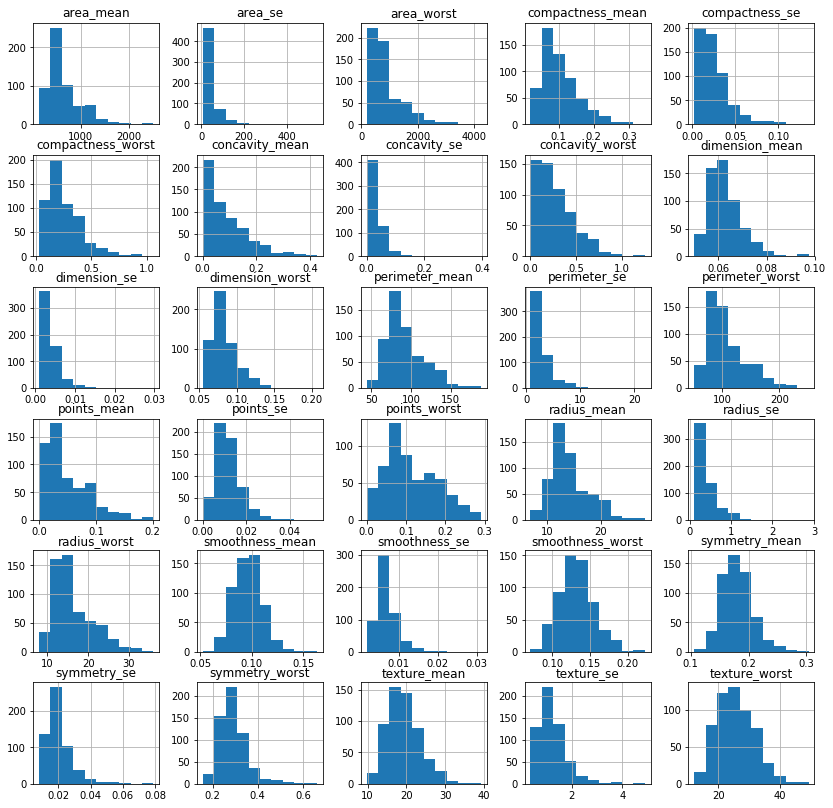

In [8]:
df.hist(figsize=(14,14))


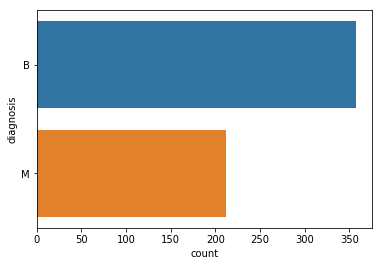

In [9]:
sns.countplot(y='diagnosis', data=df)

In [10]:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

In [11]:
#Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [12]:
#Binarizing Labels M=1 B=0
yd=pd.get_dummies(df.diagnosis)
Y=yd.M
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: M, dtype: uint8

In [13]:
Y.tail()

564    0
565    0
566    1
567    0
568    1
Name: M, dtype: uint8

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [15]:
print(X_train.shape)
print(X_test.shape)
#Y_train = np.asarray(Y_train).reshape(-1,1)
#Y_test = np.asarray(Y_test).reshape(-1,1)
print(Y_train.shape)
print(Y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [16]:
knn =  KNeighborsClassifier(n_neighbors=9).fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.976608187135


In [17]:
confusion_matrix(Y_test,y_pred)

array([[113,   1],
       [  3,  54]])

In [18]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       114
           1       0.98      0.95      0.96        57

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## With K-Fold Cross Validation (10-fold cross validation)

In [19]:
clf =  KNeighborsClassifier(n_neighbors=9)
cv_scores = cross_val_score(clf, X, Y, cv=10)

print(cv_scores)
print("\nCross Validation Scores mean:{}".format(np.mean(cv_scores)))

[ 0.94827586  0.9137931   0.98245614  0.94736842  0.98245614  1.
  0.94736842  1.          0.96428571  0.98214286]

Cross Validation Scores mean:0.966814665975283


model: KNN
thresholds: [ 2.     1.     0.889  0.778  0.667  0.556  0.444  0.333  0.222  0.111  0.   ]
tpr:        [ 0.     0.684  0.789  0.86   0.895  0.947  0.947  0.965  0.982  0.982  1.   ]
fpr:        [ 0.     0.     0.     0.009  0.009  0.009  0.035  0.07   0.096  0.211  1.   ]


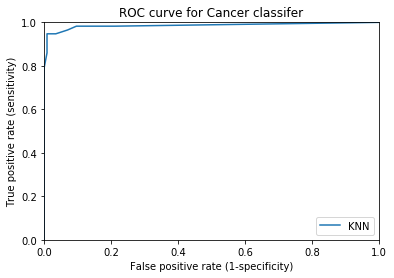

In [20]:
y_pred_knn_p =knn.predict_proba(X_test)[:,1]

models=[y_pred_knn_p]
label=['KNN']

fpr, tpr,thresholds= metrics.roc_curve(Y_test,models[0])
print('model:',label[0])
print('thresholds:',np.round(thresholds,3))
print('tpr:       ',np.round(tpr,3))
print('fpr:       ',np.round(fpr,3))
plt.plot(fpr,tpr,label=label[0])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

## Suitable value of k

In [21]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0,0.5,'Mean Error')

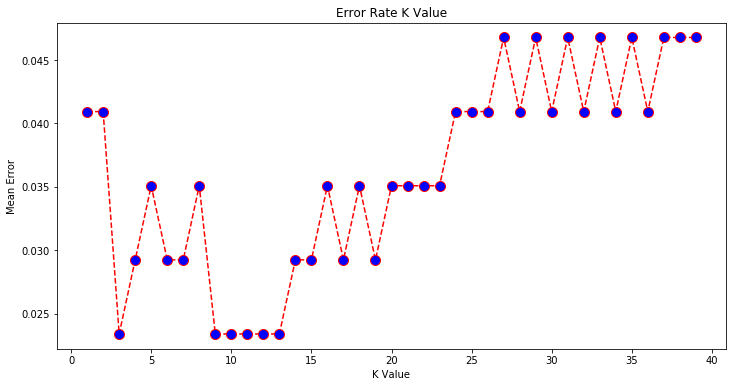

In [22]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

Suitable number of K =3,9-13 as errors are minimum

In [23]:
knn = KNeighborsClassifier(n_neighbors=9)
cv = StratifiedKFold(n_splits=10,shuffle=False)


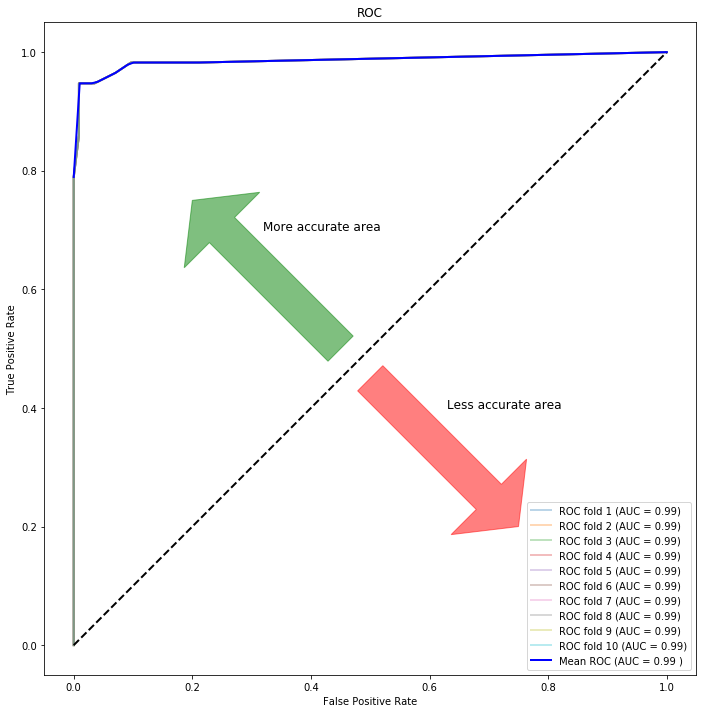

In [24]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(X,Y):
    prediction = clf.fit(X_train,Y_train).predict_proba(X_test)
    fpr, tpr, t = roc_curve(Y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()